In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model

np.random.seed(42)

# -----------------------------
# 1. Simulate Financial Prices
# -----------------------------

n = 1500
mu = 0.0005
sigma = 0.01

returns = np.random.normal(mu, sigma, n)
price = 100 * np.exp(np.cumsum(returns))

data = pd.DataFrame({
    "Price": price,
    "Returns": returns
})

# Plot price
plt.figure()
plt.plot(data["Price"])
plt.title("Simulated Asset Price")
plt.show()

# -----------------------------
# 2. Check Returns
# -----------------------------

plt.figure()
plt.plot(data["Returns"])
plt.title("Log Returns")
plt.show()

# ACF plot (check autocorrelation)
plot_acf(data["Returns"])
plt.show()

# -----------------------------
# 3. ARIMA Model (Mean Process)
# -----------------------------

arima_model = ARIMA(data["Returns"], order=(1, 0, 1))
arima_result = arima_model.fit()

print(arima_result.summary())

# Forecast next 10 periods
arima_forecast = arima_result.forecast(steps=10)
print("ARIMA Forecasted Returns:")
print(arima_forecast)

# -----------------------------
# 4. GARCH Model (Volatility)
# -----------------------------

garch_model = arch_model(data["Returns"] * 100, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

print(garch_result.summary())

# Forecast volatility
garch_forecast = garch_result.forecast(horizon=10)

forecast_variance = garch_forecast.variance.values[-1, :]
forecast_volatility = np.sqrt(forecast_variance)

print("Forecasted Volatility (Next 10 Periods):")
print(forecast_volatility)

# Plot conditional volatility
plt.figure()
plt.plot(garch_result.conditional_volatility)
plt.title("Estimated Conditional Volatility (GARCH)")
plt.show()

ModuleNotFoundError: No module named 'arch'

In [3]:
pip install numpy pandas matplotlib statsmodels arch


   ---------------------------------------- 0.0/930.4 kB ? eta -:--:--
   - ------------------------------------- 30.7/930.4 kB 660.6 kB/s eta 0:00:02
   ------- -------------------------------- 174.1/930.4 kB 1.7 MB/s eta 0:00:01
   ------------------- -------------------- 450.6/930.4 kB 3.5 MB/s eta 0:00:01
   ------------------------------ --------- 716.8/930.4 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------  921.6/930.4 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------  921.6/930.4 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------  921.6/930.4 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------  921.6/930.4 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 930.4/930.4 kB 2.4 MB/s eta 0:00:00


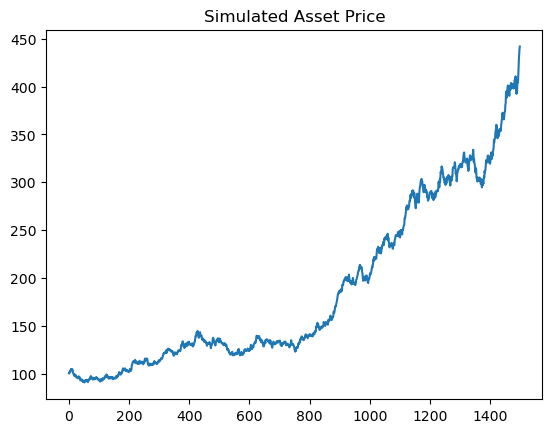

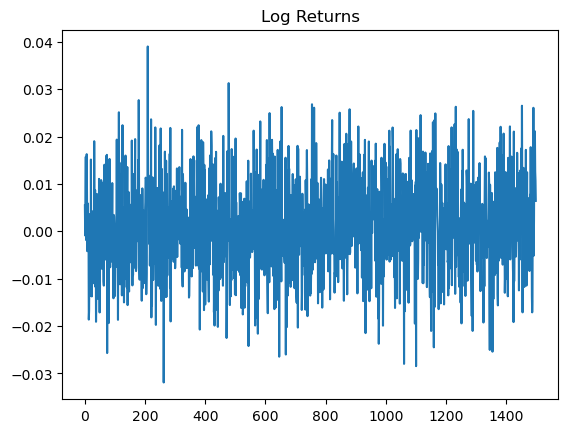

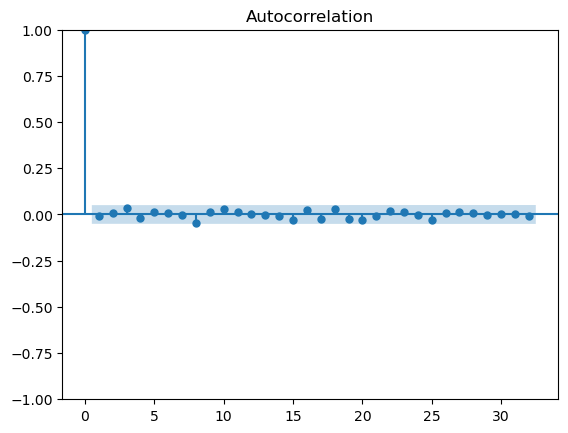

C:\Users\anshu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anshu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 1500
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4794.585
Date:                Thu, 26 Feb 2026   AIC                          -9581.170
Time:                        21:46:12   BIC                          -9559.917
Sample:                             0   HQIC                         -9573.252
                               - 1500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      3.865      0.000       0.000       0.001
ar.L1      -2.509e-07      0.013  -1.93e-05      1.000      -0.025       0.025
ma.L1      -2.512e-07      0.013  -1.93e-05      1.0

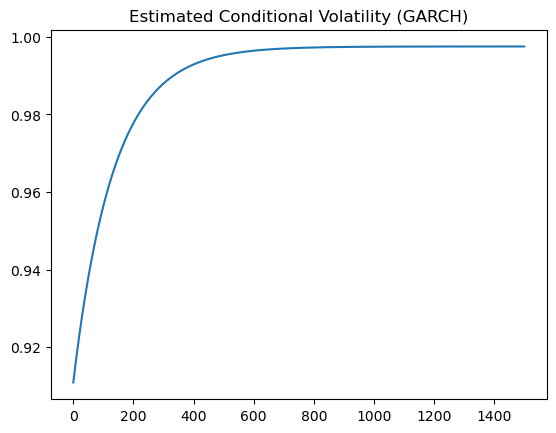

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model

np.random.seed(42)

# -----------------------------
# 1. Simulate Financial Prices
# -----------------------------

n = 1500
mu = 0.0005
sigma = 0.01

returns = np.random.normal(mu, sigma, n)
price = 100 * np.exp(np.cumsum(returns))

data = pd.DataFrame({
    "Price": price,
    "Returns": returns
})

# Plot price
plt.figure()
plt.plot(data["Price"])
plt.title("Simulated Asset Price")
plt.show()

# -----------------------------
# 2. Check Returns
# -----------------------------

plt.figure()
plt.plot(data["Returns"])
plt.title("Log Returns")
plt.show()

# ACF plot (check autocorrelation)
plot_acf(data["Returns"])
plt.show()

# -----------------------------
# 3. ARIMA Model (Mean Process)
# -----------------------------

arima_model = ARIMA(data["Returns"], order=(1, 0, 1))
arima_result = arima_model.fit()

print(arima_result.summary())

# Forecast next 10 periods
arima_forecast = arima_result.forecast(steps=10)
print("ARIMA Forecasted Returns:")
print(arima_forecast)

# -----------------------------
# 4. GARCH Model (Volatility)
# -----------------------------

garch_model = arch_model(data["Returns"] * 100, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

print(garch_result.summary())

# Forecast volatility
garch_forecast = garch_result.forecast(horizon=10)

forecast_variance = garch_forecast.variance.values[-1, :]
forecast_volatility = np.sqrt(forecast_variance)

print("Forecasted Volatility (Next 10 Periods):")
print(forecast_volatility)

# Plot conditional volatility
plt.figure()
plt.plot(garch_result.conditional_volatility)
plt.title("Estimated Conditional Volatility (GARCH)")
plt.show()